In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv("C:\\Datasets\\Bike_Data.csv",date_parser="dteday")
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
507,508,23-05-2019,2,1,5,0,4,1,2,25.488347,29.23060,77.4583,6.834000,766,4494,5260
445,446,22-03-2019,2,1,3,0,5,1,1,22.720847,26.57835,83.1250,7.876654,1334,5537,6871
448,449,25-03-2019,2,1,3,0,1,1,2,17.937500,21.87440,88.0833,14.791925,1532,3464,4996
313,314,10-11-2018,4,0,11,0,6,0,2,15.580000,18.68605,81.3333,12.667489,190,2743,2933
212,213,01-08-2018,3,0,8,0,3,1,1,31.638347,35.16460,55.0833,10.500039,729,3537,4266


### Goal:- 
Develop a model to find the variables that are significant in the demand for shared bikes wit 
the available independent variables and report appropriate metrics of your model evaluation.

### Outcome:- 
The variables that are significant in predicting the demand for shared bikes (at least 3).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe(include = "all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


In [7]:
df.isnull().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df["day"]=df["dteday"].str.split("-")[0][0]

df["day"] = pd.to_numeric(df["day"])

In [9]:
df = df.drop(columns=["dteday","atemp"])

Text(0.5, 1.0, 'Correlation HeatMap')

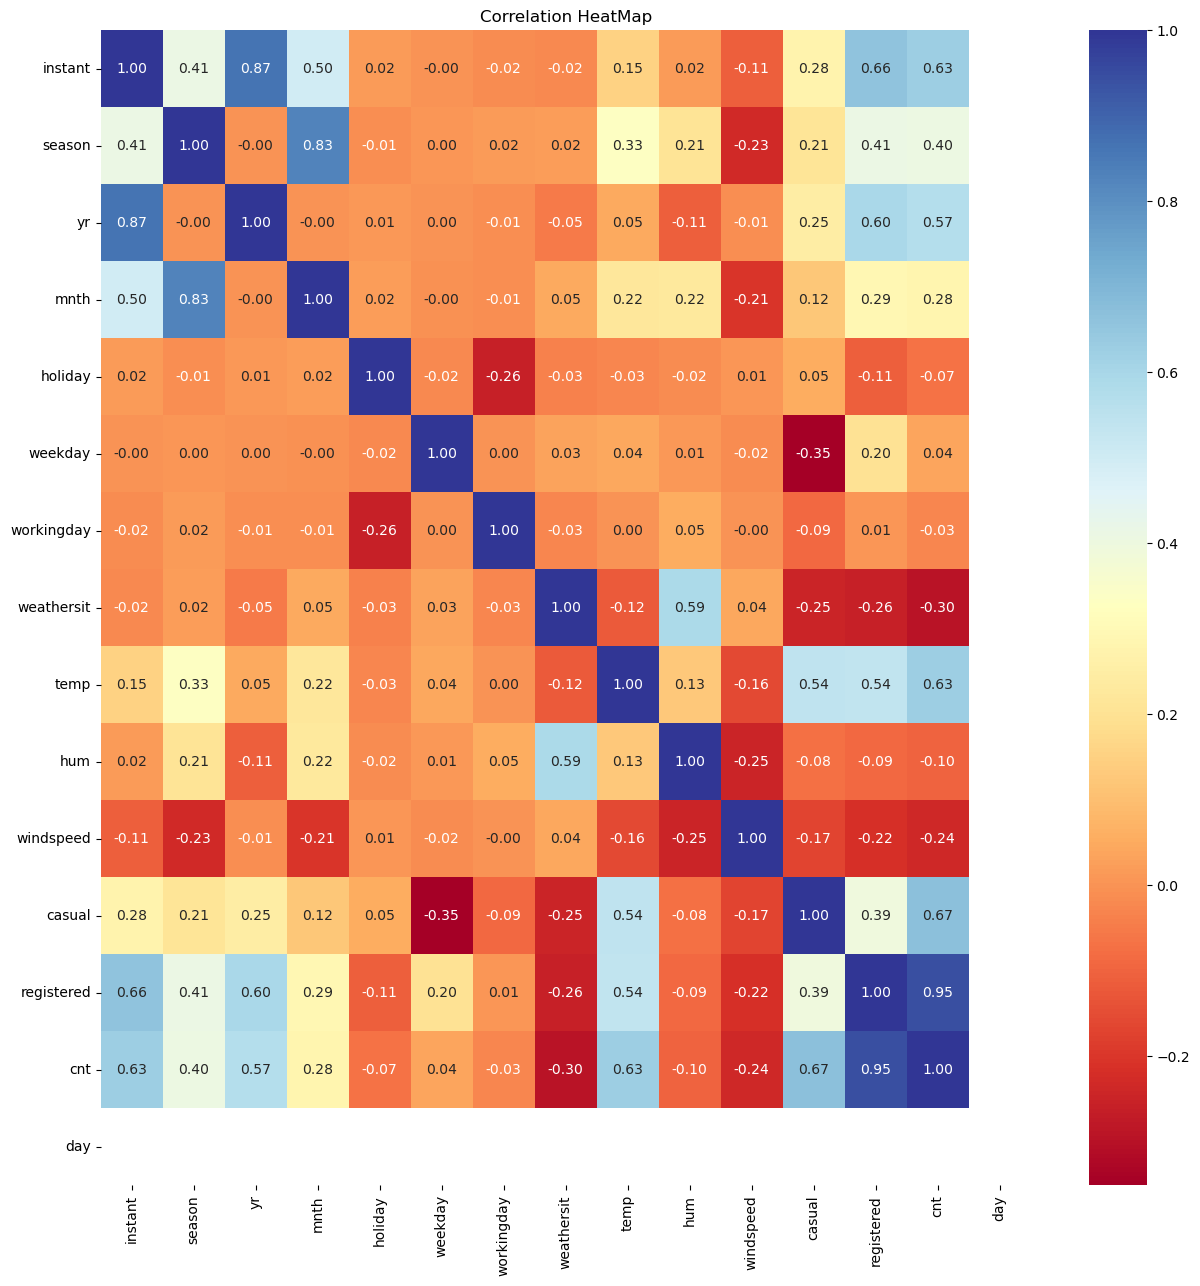

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap="RdYlBu",annot=True,fmt=".2f")
plt.title("Correlation HeatMap")

In [11]:
df = df.drop(columns="day")

In [12]:
## finding Unique colums
num_col = []
cat_col = []
for col in df.columns:
    count = len(df[col].unique())
    if count > 15:
        num_col.append(col)
    else:
        cat_col.append(col)

print(cat_col)
print(num_col)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
['instant', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [13]:
num_col.remove("cnt")

In [14]:
num_col

['instant', 'temp', 'hum', 'windspeed', 'casual', 'registered']

In [15]:
for col in cat_col:
    print("-"*20)
    print(f"{df[col].value_counts()}")

--------------------
season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
--------------------
yr
0    365
1    365
Name: count, dtype: int64
--------------------
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
--------------------
holiday
0    709
1     21
Name: count, dtype: int64
--------------------
weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64
--------------------
workingday
1    504
0    226
Name: count, dtype: int64
--------------------
weathersit
1    463
2    246
3     21
Name: count, dtype: int64


In [16]:
cat_col = ['season', 'mnth', 'weathersit']

### Importing Statsmodel

In [18]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(columns="cnt")
y = df["cnt"]

# Splitting model into test and train model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((584, 13), (146, 13))

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_train.shape

(584, 13)

In [21]:
X_train = pd.get_dummies(X_train,columns=cat_col,drop_first=True,dtype=int)

In [22]:
X_train.shape

(584, 26)

In [23]:
X_train = sm.add_constant(X_train)

In [24]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.986e+27
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:03:16   Log-Likelihood:                 12646.
No. Observations:                 584   AIC:                        -2.524e+04
Df Residuals:                     557   BIC:                        -2.512e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   3.38e-11   6.51e+11      0.000      22.000      22.000
instant       -2.41e-11   3.38e-10     -0.071      0.943   -6.87e-10    6.39e-10
yr            1.023e-11    1.7e-10      0.060      0.952   -3.25e-10    3.45e-10
holiday      -1.592e-12   2.46e-11     -0.065      0.948   -4.99e-11    4.67e-11
weekday      -2.379e-11   2.51e-12     -9.488      0.000   -2.87e-11   -1.89e-11
workingday   -2.387e-12   9.34e-12     -0.256      0.798   -2.07e-11     1.6e-11
temp         -4.093e-12   5.14e-11     -0.080      0.937   -1.05e-10    9.68e-11
hum           -7.39e-12   4.06e-11     -0.182      0.855    -8.7e-11    7.23e-11
windspeed     -1.99e-12   2.46e-11     -0.081      0.936   -5.04e-11    4.64e-11
casual        3408.0000   3.15e-11   1.08e+14      0.000    3408.000    3408.000
registered    6926.0000   4.06e-11   1.71e+14      0.000    6926.000    6926.000
season_2      1.194e-12   2.84e-11      0.042      0.966   -5.46e-11     5.7e-11
season_3      2.842e-12   3.21e-11      0.089      0.929   -6.02e-11    6.58e-11
season_4      1.364e-12   2.91e-11      0.047      0.963   -5.58e-11    5.85e-11
mnth_2       -1.307e-12   2.45e-11     -0.053      0.958   -4.95e-11    4.69e-11
mnth_3       -1.137e-13    3.8e-11     -0.003      0.998   -7.48e-11    7.46e-11
mnth_4        2.842e-13   5.59e-11      0.005      0.996    -1.1e-10     1.1e-10
mnth_5       -2.274e-13   6.86e-11     -0.003      0.997   -1.35e-10    1.35e-10
mnth_6       -6.253e-13   8.17e-11     -0.008      0.994   -1.61e-10     1.6e-10
mnth_7        3.411e-13   9.48e-11      0.004      0.997   -1.86e-10    1.87e-10
mnth_8        9.095e-13   1.08e-10      0.008      0.993   -2.11e-10    2.13e-10
mnth_9        9.095e-13   1.19e-10      0.008      0.994   -2.33e-10    2.35e-10
mnth_10       2.956e-12   1.32e-10      0.022      0.982   -2.56e-10    2.62e-10
mnth_11       3.752e-12   1.45e-10      0.026      0.979   -2.81e-10    2.88e-10
mnth_12       7.731e-12   1.57e-10      0.049      0.961      -3e-10    3.16e-10
weathersit_2 -6.679e-13   1.12e-11     -0.060      0.952   -2.26e-11    2.13e-11
weathersit_3  2.387e-12   2.87e-11      0.083      0.934   -5.39e-11    5.87e-11
==============================================================================
Omnibus:                      568.567   Durbin-Watson:                   0.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.148
Skew:                          -0.048   Prob(JB):                     5.20e-09
Kurtosis:                       1.752   Cond. No.                         489.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model.pvalues > 0.05

const           False
instant          True
yr               True
holiday          True
weekday         False
workingday       True
temp             True
hum              True
windspeed        True
casual          False
registered      False
season_2         True
season_3         True
season_4         True
mnth_2           True
mnth_3           True
mnth_4           True
mnth_5           True
mnth_6           True
mnth_7           True
mnth_8           True
mnth_9           True
mnth_10          True
mnth_11          True
mnth_12          True
weathersit_2     True
weathersit_3     True
dtype: bool

In [26]:
while True:
    p_values = model.pvalues 
    max_p_value = p_values.max() 
    if max_p_value > 0.05: 
        max_p_value_column = p_values.idxmax() 
        X_train = X_train.drop(columns=[max_p_value_column]) 
        print(max_p_value_column)
        model = sm.OLS(y_train, X_train).fit() 
    else: 
        break

mnth_3
season_4
mnth_7
mnth_4
mnth_10
weathersit_3
mnth_9
mnth_5
holiday
yr
mnth_11
windspeed
weathersit_2
temp
mnth_6
instant
workingday
mnth_8
mnth_12
mnth_2


In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.186e+32
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:03:16   Log-Likelihood:                 14978.
No. Observations:                 584   AIC:                        -2.994e+04
Df Residuals:                     577   BIC:                        -2.991e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0000   4.08e-13    5.4e+13      0.000      22.000      22.000
weekday     5.045e-13   4.31e-14     11.698      0.000     4.2e-13    5.89e-13
hum        -2.586e-12   5.04e-13     -5.131      0.000   -3.58e-12    -1.6e-12
casual      3408.0000    4.9e-13   6.96e+15      0.000    3408.000    3408.000
registered  6926.0000   3.86e-13    1.8e+16      0.000    6926.000    6926.000
season_2    1.421e-12   1.94e-13      7.309      0.000    1.04e-12     1.8e-12
season_3    1.734e-12      2e-13      8.667      0.000    1.34e-12    2.13e-12
==============================================================================
Omnibus:                        5.601   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.387
Skew:                           0.104   Prob(JB):                        0.112
Kurtosis:                       2.630   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
## VIF

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [29]:
vif = calculate_vif(X_train)
print(vif)

     Features        VIF
0       const  30.982216
1     weekday   1.376358
2         hum   1.016949
3      casual   1.799687
4  registered   1.442342
5    season_2   1.321460
6    season_3   1.454706


- Only const has high VIF greater then 10 dropping it

In [31]:
X_train = X_train.drop(columns="const")

X_train.columns

Index(['weekday', 'hum', 'casual', 'registered', 'season_2', 'season_3'], dtype='object')

### Applying Same Transformation in test data

In [33]:
# Min max scaler
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying Dummies
X_test = pd.get_dummies(X_test,columns=cat_col,dtype=int)

used_col = ['weekday', 'hum', 'casual', 'registered', 'season_2', 'season_3']

# final data
X_test = X_test[used_col]
X_test.shape

(146, 6)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 6), (146, 6), (584,), (146,))

## Finding Best Model for Givin data

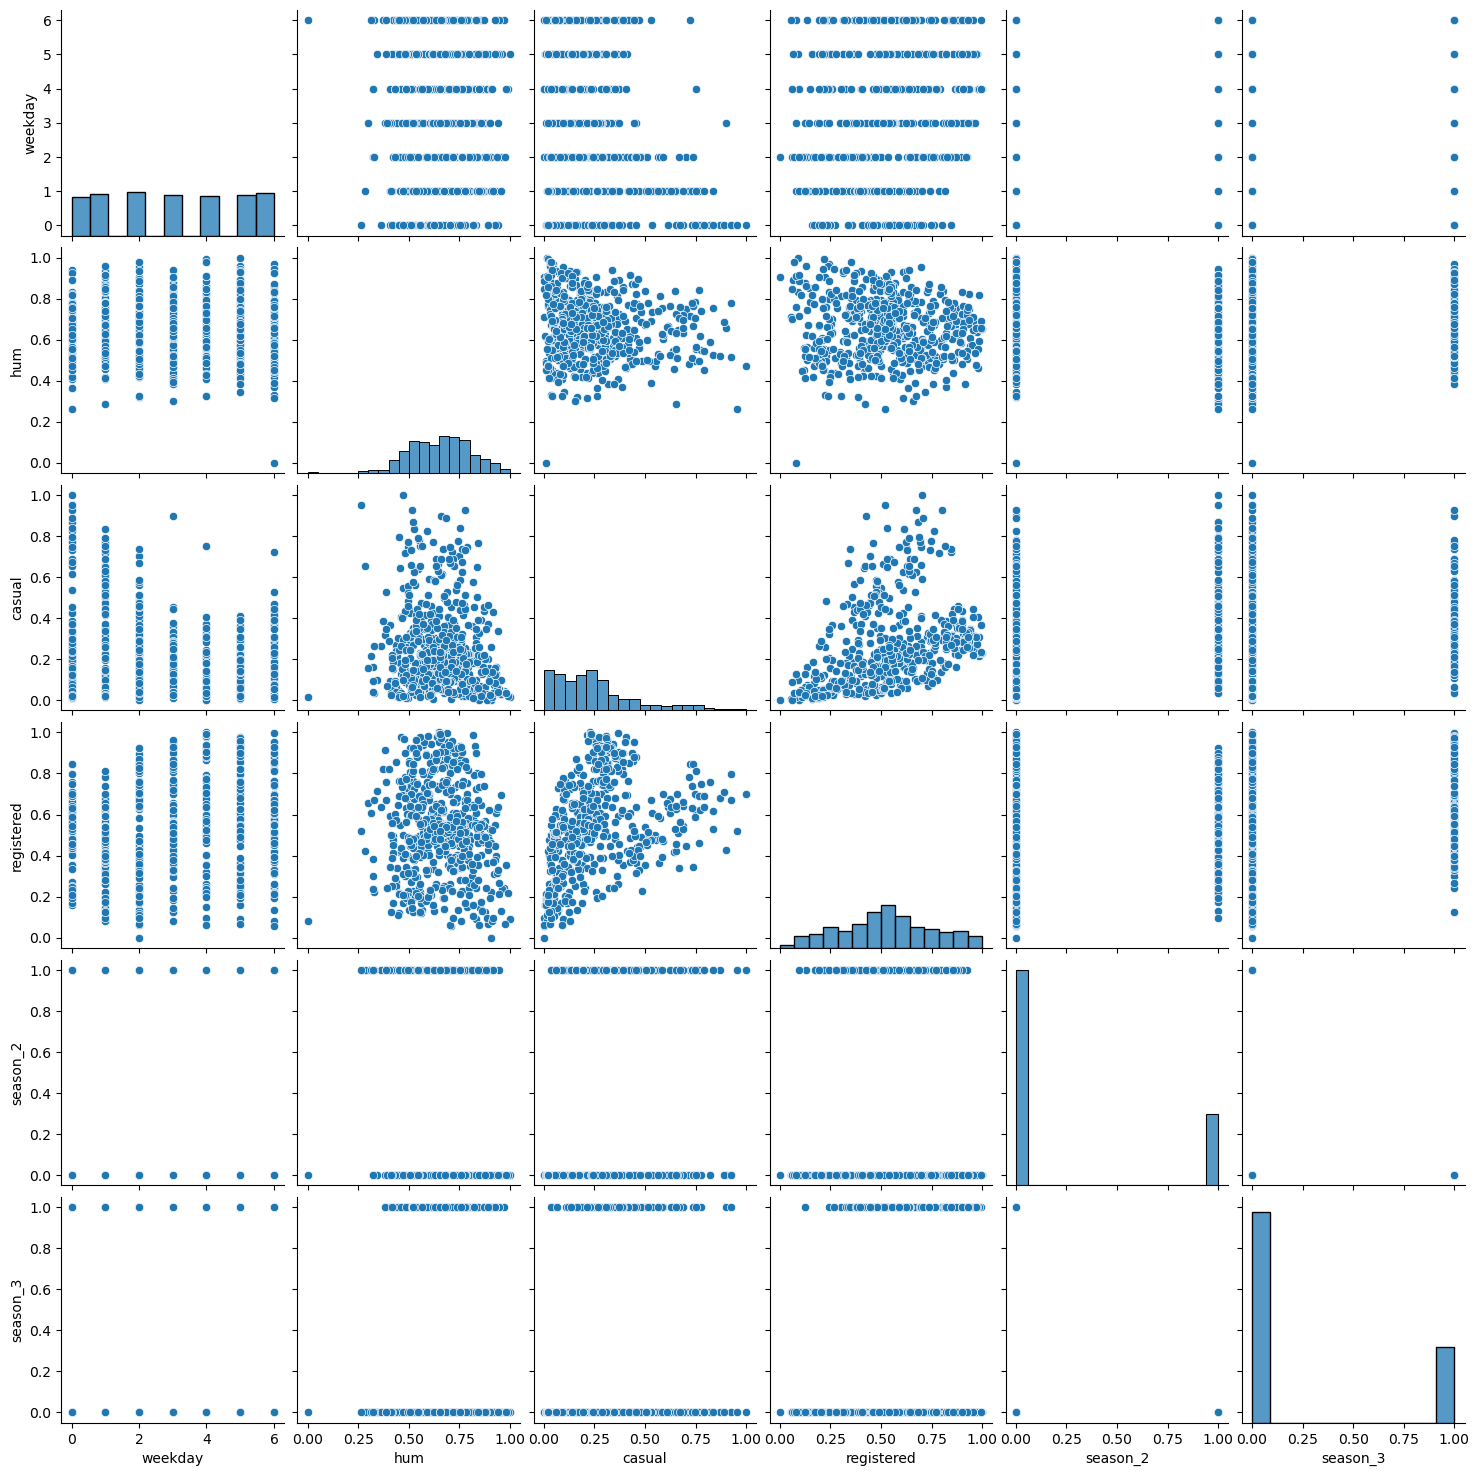

In [36]:
sns.pairplot(data = X_train)

In [37]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

In [38]:
lm = LinearRegression(n_jobs=-1)

lm.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [39]:
y_train_predict = lm.predict(X_train)

print("R2 score is ", r2_score(y_train,y_train_predict))
print("Mean Squared Error is ",mean_squared_error(y_train,y_train_predict))

R2 score is  1.0
Mean Squared Error is  4.842695634185015e-25


In [40]:
parameters = {"alpha" : np.arange(0,1.2,0.2) ,
            "l1_ratio": np.arange(0.1,1.1,0.2)}
model = ElasticNet()
grid_cv = GridSearchCV(estimator=model, param_grid=parameters,
                      cv=5, verbose=2,scoring="accuracy",n_jobs=-1)

grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy', verbose=2)

In [41]:
y_train_pred_cv = grid_cv.predict(X_train)

print("R2 score is ", r2_score(y_train,y_train_pred_cv))
print("Mean Squared Error is ",mean_squared_error(y_train,y_train_pred_cv))

R2 score is  0.9999999993566524
Mean Squared Error is  0.0024548165185377746


In [42]:
grid_cv.best_estimator_

ElasticNet(alpha=0.0, l1_ratio=0.1)

In [43]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear',C=300,gamma="auto")

svr_model.fit(X_train,y_train)

y_train_pred_svr = svr_model.predict(X_train)

print("R2 score is ", r2_score(y_train,y_train_pred_svr))
print("Mean Squared Error is ",mean_squared_error(y_train,y_train_pred_svr))

R2 score is  0.9999999989737508
Mean Squared Error is  0.0039158512262945895


In [44]:
Models = {"Linear Regessor":lm,
         "ElasticNet" : grid_cv,
         "SVR" : svr_model}


for name,model in Models.items():
    print("--"*20)
    print(name)
    y_pred = model.predict(X_test)
    print("R2 score is ", r2_score(y_test,y_pred))
    print("Mean Squared Error is ",mean_squared_error(y_test,y_pred))

----------------------------------------
Linear Regessor
R2 score is  1.0
Mean Squared Error is  4.571447648998111e-25
----------------------------------------
ElasticNet
R2 score is  0.9999999992919564
Mean Squared Error is  0.0024235216045195183
----------------------------------------
SVR
R2 score is  0.999999999024034
Mean Squared Error is  0.0033405774060691934


## Best Model is Linear Regression